<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/04%20Clasificaci%C3%B3n%20y%20Agrupamiento/notebooks/10-Reducci%C3%B3n_Dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ejemplos ilustrativos


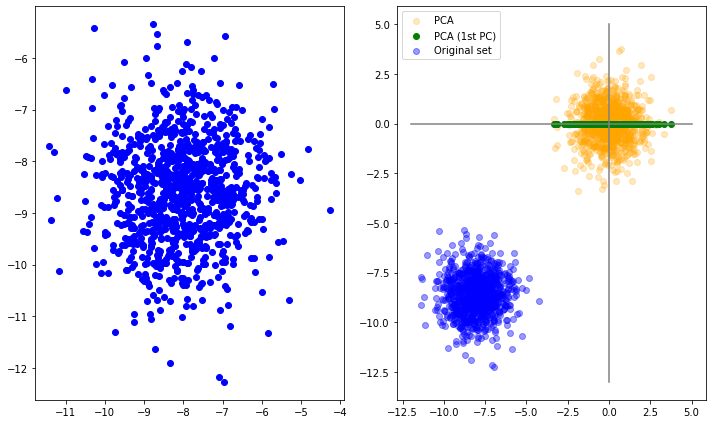

In [ ]:
from sklearn.datasets import make_circles, make_blobs

X,_ = make_blobs(n_samples=1000, centers=1, random_state=1945)

pca = PCA()
X_red = pca.fit_transform(X)

fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].scatter(X[:,0],X[:,1],color='blue')
# --- We draw the axis, for reference:
axs[1].scatter(X_red[:,0],X_red[:,1],alpha=0.25,color='orange',label="PCA")
axs[1].scatter(X_red[:,0],[0 for x in X_red],color='green',label="PCA (1st PC)")
axs[1].scatter(X[:,0],X[:,1],alpha=0.4,color='blue',label="Original set")
axs[1].plot([-12,5],[0,0],color='gray')
axs[1].plot([0,0],[-13,5],color='gray')
axs[1].legend(loc='best')
fig.tight_layout()
fig.show()

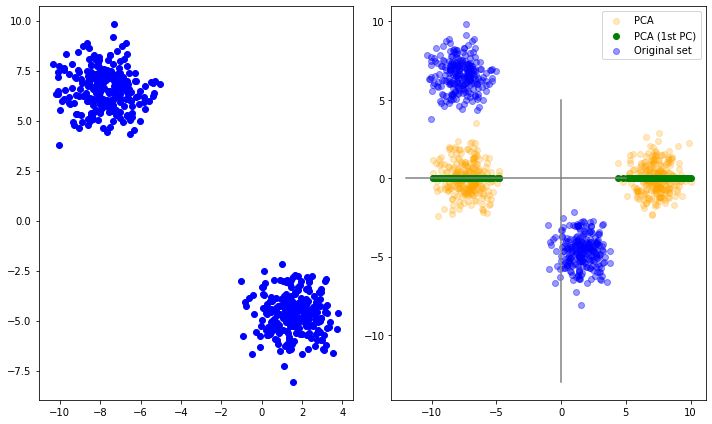

In [ ]:
from sklearn.datasets import make_circles, make_blobs

X,y = make_blobs(n_samples=500, centers=2, random_state=11)

idxs = np.where(y==0)[0]
X[idxs,:] = X[idxs,:] + [[8,5]]
idxs = np.where(y==1)[0]
X[idxs,:] = X[idxs,:] + [[-7,2]]

pca = PCA()
X_red = pca.fit_transform(X)

fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].scatter(X[:,0],X[:,1],color='blue')
# --- We draw the axis, for reference:
axs[1].scatter(X_red[:,0],X_red[:,1],alpha=0.25,color='orange',label="PCA")
axs[1].scatter(X_red[:,0],[0 for x in X_red],color='green',label="PCA (1st PC)")
axs[1].scatter(X[:,0],X[:,1],alpha=0.4,color='blue',label="Original set")
axs[1].plot([-12,5],[0,0],color='gray')
axs[1].plot([0,0],[-13,5],color='gray')
axs[1].legend(loc='best')
fig.tight_layout()
fig.show()

En este ejemplo podemos ver la perdida de detalles del conjunto original

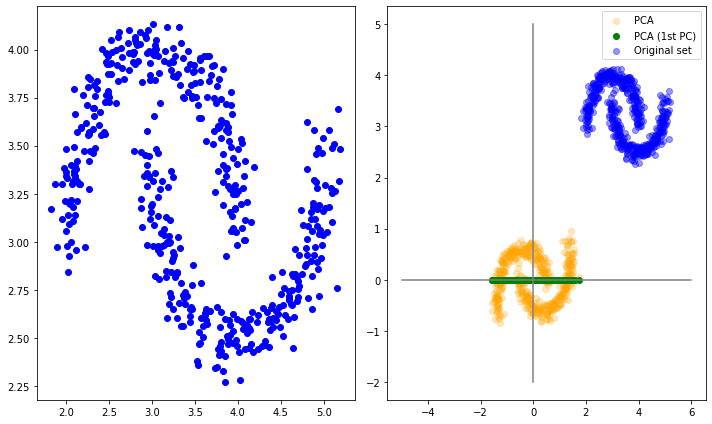

In [ ]:
from sklearn.datasets import make_moons

X,_ = make_moons(n_samples=500,random_state=1945,noise=0.1)

X = X + [[3,3]]

pca = PCA()
X_red = pca.fit_transform(X)

fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].scatter(X[:,0],X[:,1],color='blue')
# --- We draw the axis, for reference:
axs[1].scatter(X_red[:,0],X_red[:,1],alpha=0.25,color='orange',label="PCA")
axs[1].scatter(X_red[:,0],[0 for x in X_red],color='green',label="PCA (1st PC)")
axs[1].scatter(X[:,0],X[:,1],alpha=0.4,color='blue',label="Original set")
axs[1].plot([-5,6],[0,0],color='gray')
axs[1].plot([0,0],[-2,5],color='gray')
axs[1].legend(loc='best')
fig.tight_layout()
fig.show()

# Práctica 1: MNIST

In [ ]:
import numpy as np
from keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.reshape(x_train, (len(x_train), -1)) / 255.
x_test = np.reshape(x_test, (len(x_test), -1)) / 255.

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


Veamos el coeficiente de silueta de los datos en el espacio de dimensión 784.

In [ ]:
from sklearn.metrics import silhouette_score

labels = np.unique(y_train)

silhouette_score(x_train,y_train)    

0.042750593525671406

## 1. PCA

Ahora, apliquemos PCA a los datos. De esta manera, reducimos la dimensión de los puntos, de 784 a sólo 2.

**Importante**: Observa que entrenamos a PCA con el conjunto de entrenamiento y el conjunto de prueba, sólo lo transformamos con el modelo ya entrenado. 

⭕ ¿Por qué no entrenar con todo el conjunto de datos?

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(x_train)

PCA(n_components=2)

In [ ]:
z_train = pca.transform(x_train)
z_test = pca.transform(x_test)

print(z_train.shape)
print(z_test.shape)

(60000, 2)
(10000, 2)


¿Cómo es ahora el score de silueta en este nuevo espacio bidimensional?

In [ ]:
print(f"Train: {silhouette_score(z_train,y_train)}")
print(f"Test: {silhouette_score(z_test,y_test)}")    

Train: 0.023478878439427385
Test: 0.022967790536121295


Ya podemos ver cómo se ve el conjunto de puntos, separado por clases.

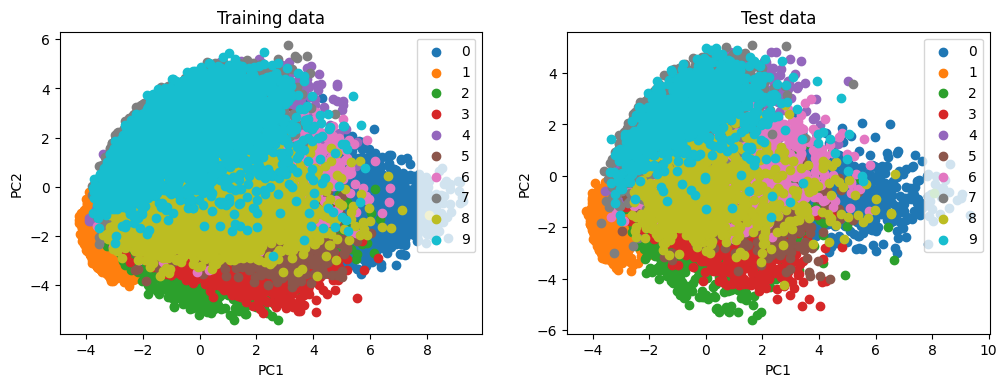

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4),dpi=100)
plt.subplot(1, 2, 1)
plt.title("Training data")
for cl in range(10):
  plt.scatter(z_train[y_train==cl, 0], z_train[y_train==cl, 1], label=cl)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1, 2, 2)
plt.title("Test data")
for cl in range(10):
  plt.scatter(z_test[y_test==cl, 0], z_test[y_test==cl, 1], label=cl)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Veamos la varianza agregada por cada una de las primeras 20 componentes principales, usando el atributo `explained_variance_ratio_` de la clase PCA.

[0.09704664 0.07095924 0.06169089 0.05389419 0.04868797 0.04312231
 0.0327193  0.02883895 0.02762029 0.02357    0.0210919  0.02022991
 0.01715818 0.01692111 0.01578633 0.01482933 0.01324532 0.01276858
 0.01187226 0.0115262 ]


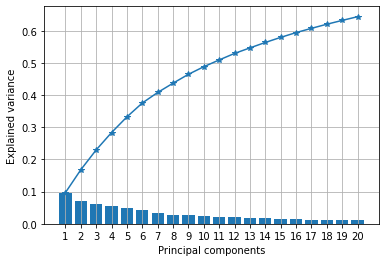

In [ ]:
pca = PCA(n_components=20).fit(x_train)

plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1), range(1, len(pca.explained_variance_ratio_)+1))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), '-*')
plt.grid()
plt.xlabel("Principal components")
plt.ylabel("Explained variance")
print(pca.explained_variance_ratio_)

Varianza de todas las componentes principales.

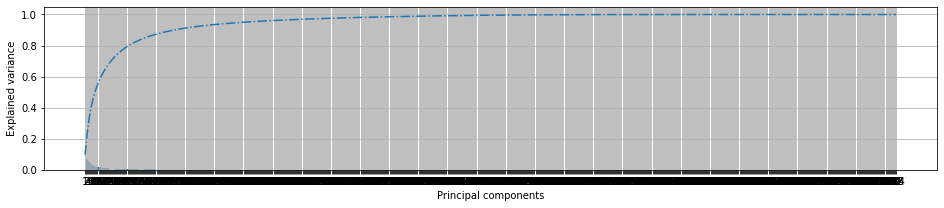

In [ ]:
pca = PCA(n_components=784).fit(x_train)

plt.figure(figsize=(16, 3))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1), range(1, len(pca.explained_variance_ratio_)+1))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), '-.')
plt.grid()
plt.xlabel("Principal components")
plt.ylabel("Explained variance")
plt.show()

¿Con cuántas componentes principales conseguirías 95% de la varianza?

El 95% de la varianza se obtiene con 153 componentes principales


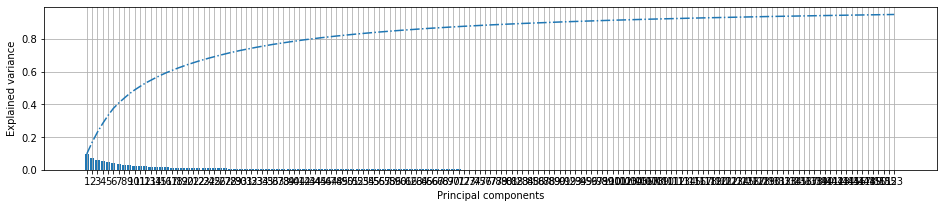

In [ ]:
maxPC = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.95)[0][0]
print(f"El 95% de la varianza se obtiene con {maxPC} componentes principales")

plt.figure(figsize=(16, 3))
plt.bar(range(1, len(pca.explained_variance_ratio_[:maxPC])+1), pca.explained_variance_ratio_[:maxPC])
plt.xticks(range(1, len(pca.explained_variance_ratio_[:maxPC])+1), range(1, len(pca.explained_variance_ratio_[:maxPC])+1))
plt.plot(range(1, len(pca.explained_variance_ratio_[:maxPC])+1), np.cumsum(pca.explained_variance_ratio_[:maxPC]), '-.')
plt.grid()
plt.xlabel("Principal components")
plt.ylabel("Explained variance")


plt.show()

## 2. t-SNE

Ahora, exploremos [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) "t-distributed Stochastic Neighbor Embedding". 

Este método puede ser más tardado con una cantidad grande de datos y dimensiones, por lo que podemos tomar una muestra de los datos originales.

In [ ]:
from sklearn.manifold import TSNE

z_train = TSNE(n_components=2).fit_transform(x_train[:10000])
print(z_train.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(10000, 2)


Transformemos el conjunto de datos dos veces, de manera independiente para observar la naturaleza probabilística del método.

In [ ]:
z_test1 = TSNE(n_components=2).fit_transform(x_test)
print(z_test1.shape)

z_test2 = TSNE(n_components=2).fit_transform(x_test)
print(z_test2.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(10000, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(10000, 2)


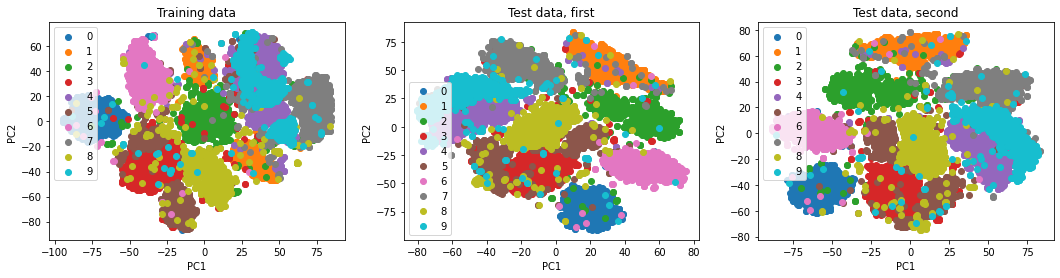

In [ ]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.title("Training data")
for cl in range(10):
  plt.scatter(z_train[y_train[:10000]==cl, 0], z_train[y_train[:10000]==cl, 1], label=cl)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 3, 2)
plt.title("Test data, first")
for cl in range(10):
  plt.scatter(z_test1[y_test==cl, 0], z_test1[y_test==cl, 1], label=cl)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 3, 3)
plt.title("Test data, second")
for cl in range(10):
  plt.scatter(z_test2[y_test==cl, 0], z_test2[y_test==cl, 1], label=cl)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

## 3. SOM's 

**PENDIENTE**

In [ ]:
# https://github.com/JustGlowing/minisom
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=ba896800ef27db097740d835eab807e1b79949cad56b559bee60edfe4dfa4deb
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [ ]:
from minisom import MiniSom

In [ ]:
# Train it
som = MiniSom(30, 30, 784, sigma=4, learning_rate=0.5)
som.train(x_train, 2000, random_order=True)

In [ ]:
# See the set of weights
som.get_weights().shape

(30, 30, 784)

In [ ]:
# See mapping for one sample
som.winner(x_train[0])

(14, 9)

In [ ]:
# Map training and test sets (puede tardar unos 5 minutos)
z_train = np.array([som.winner(x) for x in x_train])
z_test = np.array([som.winner(x) for x in x_test])

# Add a bit of noise for better population of the space
#z_train = z_train + np.random.normal(loc=0.0, scale=0.2, size=(len(z_train), 2))
#z_test = z_test + np.random.normal(loc=0.0, scale=0.2, size=(len(z_test), 2))

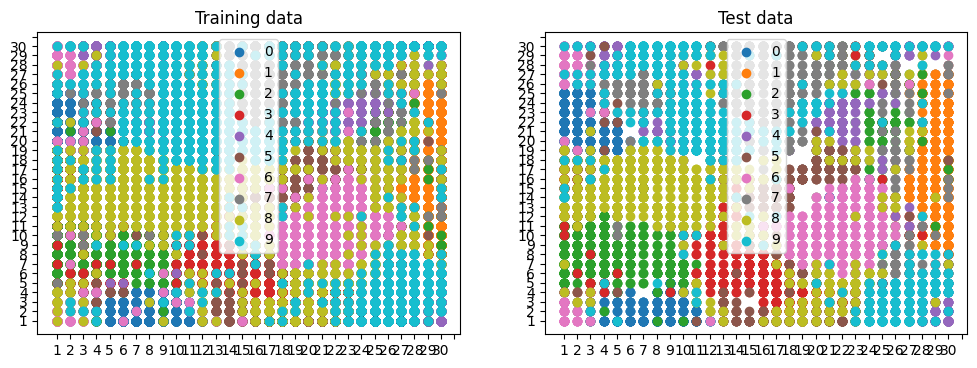

In [ ]:
# Plot mapping
plt.figure(figsize=(12, 4),dpi=100)
plt.subplot(1, 2, 1)
plt.title("Training data")
for cl in range(10):
  plt.scatter(z_train[y_train==cl, 0], z_train[y_train==cl, 1], label=cl)
plt.xticks(range(31), range(1, 31))
plt.yticks(range(31), range(1, 31))
plt.legend()
plt.subplot(1, 2, 2)
plt.title("Test data")
for cl in range(10):
  plt.scatter(z_test[y_test==cl, 0], z_test[y_test==cl, 1], label=cl)
plt.xticks(range(31), range(1, 31))
plt.yticks(range(31), range(1, 31))
plt.legend(loc='best')
plt.show()

## ⭕ Práctica

* Usando algún método de clasificación, realiza la tarea de clasificación sobre estas representaciones bidimensionales de los datos. Usa las reducciones de PCA y t-SNE.
* Reporta las métricas de clasificación: Precisión, Recall, Precision, F1score.
* Puedes cambiar el número de componentes de la reducción de dimensionalidad para realizar una mejor clasificación. En el caso de PCA, toma en cuenta el porcentaje de varianza que estás considerando. El objetivo es conservar la mayor cantidad de información, sin tener que tomar todas las dimensiones.
* Ahora, realiza la tarea de clasificación usando todas las dimensiones. ¿Qué cambios en las métricas, desempeño observas?

# Práctica 2: Documentos de Wikipedia

<h3><center>
    
**Modelado de texto usando técnicas de reducción de dimensionalidad**
<br>
Aplicación en WikiPedia para medir semejanza entre documentos

Descubrir temas es útil para diversos fines, como agrupar documentos, organizar contenido disponible en línea para recuperar información y hacer recomendaciones. El modelado de temas es una técnica de minería de texto que proporciona métodos para identificar palabras clave concurrentes, con el fin de resumir grandes colecciones de información textual. Ayuda a descubrir temas ocultos en el documento, anotar los documentos con estos temas y organizar una gran cantidad de datos no estructurados. Numerosos proveedores de contenido y agencias de noticias están utilizando modelos de temas para recomendar artículos a los lectores. 

Utilizaremos la técnica de reducción de dimensionalidad PCA (Principal Component Analysis) con el propósito de modelar documentos y establecer semejanzas entre ellos. 

Usaremos el modelo de bolsa de palabras (BoW -- Bag of words), que da como resultado una matriz documento-término que representa documentos en función del conteo de términos. 


## 1. Conjuntos de datos

In [ ]:
import sys
import string
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import glob # Módulo para encontrar archivos

from collections import Counter, OrderedDict

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!apt-get -qq install > /dev/null subversion

!svn checkout "https://github.com/DCDPUAEM/DCDP_2022/trunk/04%20Clasificaci%C3%B3n%20y%20Agrupamiento/data/"

A    data/spanishText_180000_185000
Checked out revision 98.


Este conjunto de datos completo puede encontrarse [aquí](https://www.cs.upc.edu/~nlp/wikicorpus/). Estos archivos son tipo texto con el contenido raw del texto.

*Para propósitos de este curso, solo usamos un archivo arbitrario de esta colección.*

In [ ]:
archivos = glob.glob('/content/data/spanishText_180000_185000')
print(archivos)

['/content/data/spanishText_180000_185000']


Leemos los archivos descargados y sus nombres.

In [ ]:
def carga_datos(archivos):
    '''
    Esta función lee el contenido de los archivos, separa el texto con los espacios en blanco,
    convierte todo en minúsculas
    '''
    files = []
    nombres = []
    suma = 0
    print("leyendo...")
    for i,filename in enumerate(archivos):
        with open(filename,encoding="ISO-8859-1") as f:
            content = f.read().split()
        content = [x.strip().lower() for x in content] 
        size = sys.getsizeof(content)//1048576 #tamaño en MB
        suma += size
        files.append(content)
        nombres.append(filename)
        print(filename)

    print(f"tamaño del contenido de archivos cargados: {suma} MB")
    return files, nombres

In [ ]:
files, nombres = carga_datos(archivos)

leyendo...
/content/data/spanishText_180000_185000
tamaño del contenido de archivos cargados: 14 MB


Verificamos algunos datos

In [ ]:
print(files[0][:20],files[0][-20:])

['<doc', 'id="646956"', 'title="amaury', 'iii', 'de', 'montfort"', 'nonfiltered="1"', 'processed="1"', 'dbindex="180000">', 'amaury', 'iii', '(', '1137),', 'fue', 'señor', 'de', 'montfort', 'l', 'amaury', 'de'] ['3º', 'y', '4º', 'puesto.', 'medallistas', '.', 'resultados', 'finales', '.', 'enlaces', 'externos', '.', 'cuadros', 'y', 'resultados', 'de', 'dobles', 'masculino;', 'endofarticle.', '</doc>']


## 2. Extracción y pre-procesamiento de documentos

Ahora vamos a identificar cada documento y elaborar una lista de los mismos.
Para ello, se debe tener en cuenta la forma en que se indexan listas y arreglos en Python.

Como hemos visto, los archivos de Wikipedia traen el identificador de documento ```id=``` (p.ej. _id="1842224"_) y marcadores de inicio y fin de documento, que se reconocen por el caracter ```">"``` (p.ej. _dbindex="430000">_ y ```</doc>```). 

__Lo que vamos a hacer es obtener los indices en donde se encuentran estos datos para extraer el id de documento y su contenido textual__. Esto con el fin de construir una lista de documentos.

Los textos se limpian y procesan usando el módulo ```nltk``` (Natural Language ToolKit) (Loper and Bird, 2002). 

Al final tendremos una lista cuyo contenido será como sigue:

```
docs->[[id_doc1,texto del documento doc1],[id_doc2,texto del documento doc2], ... ]
```

In [ ]:
def lee_documentos(file, nombres):
    #palabras demasiado frecuentes
    stop_words = set(stopwords.words('spanish'))

    #conjunto de palabras únicas --vocabulario
    vocabulario = set()

    registros = []
    docs = []
    completo = False
    suma = 0
    for i,archivo in enumerate(file):
        for j,cadena in enumerate(archivo):
            if 'id=' in cadena and completo == False:
                id_ = cadena[4:-1]
            elif 'dbindex=' in cadena and completo == False:
                inicio = j+1
            elif 'doc>' in cadena and completo == False:
                fin = j-1
                completo = True
            if completo:
                x = archivo[inicio:fin]
                r=pd.DataFrame(x,columns=['cadena'])
                r=r.cadena.str.translate(\
                        str.maketrans('','',string.digits))\
                        .str.translate(\
                       str.maketrans('','',string.punctuation))\
                .str.replace('«','')\
                .str.replace('»','').str.replace('(','')\
                .str.replace(')','').str.strip()
                palabras = r.tolist()
                #elimino las stopwords
                texto = [w for w in palabras \
                         if not w in stop_words and len(w)>2]
                #genero el texto del documento
                doc = ' '.join(texto)  
                registros.append([id_,doc,i])
                completo = False
                suma += 1
        print('archivo {0} contiene {1}\
        documentos \n'.format(nombres[i],suma) )
        suma=0
        docs.append(registros)
        registros=[]
    return docs

In [ ]:
docs = lee_documentos(files,nombres)
print('Se leyeron {} archivos'.format(len(docs)))
print(docs[0][0][0],docs[0][0][1][:100])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


archivo /content/data/spanishText_180000_185000 contiene 4023        documentos 

Se leyeron 1 archivos
646956 amaury iii señor montfort amaury conde évreux hijo simón señor montfort agnes évreux heredero titula


Ahora creamos un dataframe con los datos de los documentos

In [ ]:
df = pd.DataFrame(docs[0],columns = ['doc_id','Texto','clase'])
print(df.shape)
df.head()

(4023, 3)


,doc_id,Texto,clase
0,646956,amaury iii señor montfort amaury conde évreux ...,0
1,646957,ruud janssen tilburg july artista holandés flu...,0
2,646958,grandes crónicas francia compilación obras his...,0
3,646961,san miguel basauri grupo barrios tomado barrio...,0
4,646963,río perené corto río perú constituye parte sup...,0


## **Extracción de características**

Tratemos de visualizar algunas propiedades de los documentos.

Para ello vamos a utilizar un contador ([Counter](https://docs.python.org/2/library/collections.html)). Un contador es un contenedor que almacena elementos como claves de diccionario, y sus recuentos se almacenan como valores de diccionario.

Construiremos una columna con el conteo de palabras por documento y otra con la palabra más frecuente en el documento.

In [ ]:
from collections import Counter  #regresa un diccionario con conteos

df['Palabras'] = df['Texto'].apply(lambda x: x.split())
df['Total'] = df['Palabras'].apply(lambda x: len(x))
df['Conteos'] = df['Palabras'].apply(lambda x: Counter(x))

df = df.sort_values(by="Total",ascending=False)
df.reset_index(drop=True,inplace=True)
df.head()

,doc_id,Texto,clase,Palabras,Total,Conteos
0,654637,campeonato mundial pesos pesados boxeo generad...,0,"[campeonato, mundial, pesos, pesados, boxeo, g...",11586,"{'campeonato': 5, 'mundial': 827, 'pesos': 33,..."
1,653277,cali oficialmente santiago cali capital depart...,0,"[cali, oficialmente, santiago, cali, capital, ...",6637,"{'cali': 165, 'oficialmente': 1, 'santiago': 1..."
2,650728,monarquía británica monarquía compartida artíc...,0,"[monarquía, británica, monarquía, compartida, ...",5790,"{'monarquía': 30, 'británica': 23, 'compartida..."
3,653042,guerra grecia antigua frase usada describir gu...,0,"[guerra, grecia, antigua, frase, usada, descri...",4471,"{'guerra': 38, 'grecia': 11, 'antigua': 7, 'fr..."
4,656751,nombre sirna siglas inglés small interfering r...,0,"[nombre, sirna, siglas, inglés, small, interfe...",3895,"{'nombre': 1, 'sirna': 29, 'siglas': 4, 'inglé..."


## Reducción del tamaño de las matrices

Para reducir la complejidad espacial de nuestro ejercicio, podemos hacer dos cosas:
* 1.- Un muestreo aleatorio de documentos, lo que nos ayudaría a reducir el vocabulario. 
* 2.- Un recorte en el número de documentos por la cantidad de palabras.
Usaremos el segundo.

Obtenemos el vocabulario.
Para ello vamos a usar el método de tokenización de NLTK

In [ ]:
textos = df['Texto'].values
textos = " ".join(textos)
vocabulario = list(set(word_tokenize(textos))) # Manera de quitar las repeticiones de una lista
print(len(vocabulario),'palabras únicas (tipos)')

108650 palabras únicas (tipos)


Veamos la distribución de número de palabras por documentos

Promedio: 235.27392493164305


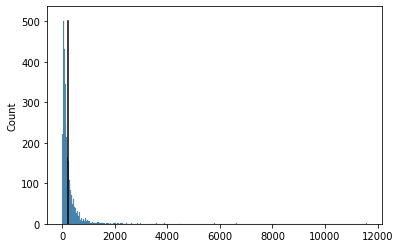

In [ ]:
from seaborn import histplot

longitudes = df['Total'].values
promedio = np.mean(longitudes)
print(f"Promedio: {promedio}")

fig = plt.figure()
ax = plt.subplot()
ax.plot([promedio,promedio],[0,500],color='black')
histplot(longitudes,ax=ax)
plt.show()

Ejemplo de transformar los datos con el logaritmo

Promedio del logaritmo: 4.897201762119567
Logaritmo del promedio: 5.46075047332263


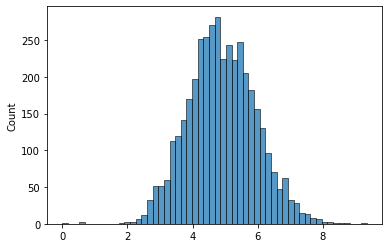

In [ ]:
log_longs = np.log(longitudes)
log_promedio = np.mean(log_longs)
print(f"Promedio del logaritmo: {log_promedio}")
print(f"Logaritmo del promedio: {np.log(promedio)}")
histplot(log_longs)
plt.show()

Filtramos algunos documentos de acuerdo a la longitud del texto

In [ ]:
df = df[(df.Total < 200) & (df.Total > 50)]
print(f"Número de documentos con los que nos quedamos: {df.shape[0]}")
df.reset_index(drop=True,inplace=True)
df.head()

Número de documentos con los que nos quedamos: 1920


,doc_id,Texto,clase,Palabras,Total,Conteos
0,657757,benjamín jowett nació abril londres inglaterra...,0,"[benjamín, jowett, nació, abril, londres, ingl...",199,"{'benjamín': 2, 'jowett': 6, 'nació': 2, 'abri..."
1,663759,torralba oropesa municipio españa comunidad au...,0,"[torralba, oropesa, municipio, españa, comunid...",199,"{'torralba': 5, 'oropesa': 10, 'municipio': 2,..."
2,657927,artículo refiere grupo musical forma canto med...,0,"[artículo, refiere, grupo, musical, forma, can...",199,"{'artículo': 1, 'refiere': 1, 'grupo': 3, 'mus..."
3,655127,título original trujillo poder jefe iii título...,0,"[título, original, trujillo, poder, jefe, iii,...",199,"{'título': 2, 'original': 1, 'trujillo': 6, 'p..."
4,648680,site map sitemap archivo xml lista páginas sit...,0,"[site, map, sitemap, archivo, xml, lista, pági...",199,"{'site': 7, 'map': 5, 'sitemap': 8, 'archivo':..."


Veamos, otra vez, la distribución de número de palabras por documentos.

Promedio: 109.57083333333334


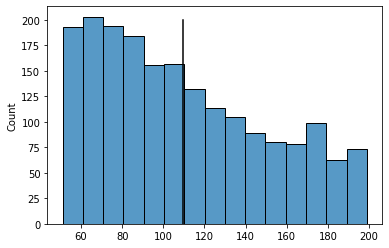

In [ ]:
from seaborn import histplot

longitudes = df['Total'].values
promedio = np.mean(longitudes)
print(f"Promedio: {promedio}")

fig = plt.figure()
ax = plt.subplot()
ax.plot([promedio,promedio],[0,200],color='black')
histplot(longitudes,ax=ax)
plt.show()

Guardamos el dataframe en formato pickle

In [ ]:
df.to_pickle('data_frame.pickle')

Leemos el dataframe previamente almacenado

In [ ]:
df = pd.read_pickle('data_frame.pickle')
df.head()

,doc_id,Texto,clase,Palabras,Total,Conteos
0,648680,site map sitemap archivo xml lista páginas sit...,0,"[site, map, sitemap, archivo, xml, lista, pági...",199,"{'site': 7, 'map': 5, 'sitemap': 8, 'archivo':..."
1,659041,ángel uribe sánchez ancón idem futbolista peru...,0,"[ángel, uribe, sánchez, ancón, idem, futbolist...",199,"{'ángel': 4, 'uribe': 4, 'sánchez': 1, 'ancón'..."
2,655127,título original trujillo poder jefe iii título...,0,"[título, original, trujillo, poder, jefe, iii,...",199,"{'título': 2, 'original': 1, 'trujillo': 6, 'p..."
3,657927,artículo refiere grupo musical forma canto med...,0,"[artículo, refiere, grupo, musical, forma, can...",199,"{'artículo': 1, 'refiere': 1, 'grupo': 3, 'mus..."
4,663759,torralba oropesa municipio españa comunidad au...,0,"[torralba, oropesa, municipio, españa, comunid...",199,"{'torralba': 5, 'oropesa': 10, 'municipio': 2,..."


## BoW
* Para obtener la Bolsa de Palabras, vamos a utilizar la columna de Conteos con los conteos de palabras respectivos por cada documento.

* Esta columna consta de diccionarios que usaremos como entrada para el módulo [DictVectorizer de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html). Este módulo transforma listas de mapeos (dicconarios) de valores de características en vectores. Este transformador convierte las listas de mapeos (objetos similares a dict) de nombres de entidades a valores de entidades, en matrices Numpy o matrices scipy.sparse para usar con estimadores de scikit-learn. Cuando los valores de las características son cadenas (strings), este transformador realizará una codificación binaria del tipo One-Hot (también conocido como uno-de-K): se construye una característica con valor booleano para cada uno de los posibles valores de string que la característica puede asumir.

* Primero, vamos a definir nuestra función BOW. Esta función recibe una lista de diccionarios y regresa una matriz $X$ de documentos y un diccionario $v$ con el vocabulario asociado a un entero. 

**Cada fila de $X$ es un documento y cada columna representa una palabra del vocabulario.**

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from collections import Counter, OrderedDict

def bow_(docs):
    v = DictVectorizer(sparse=False)
    X = v.fit_transform(docs)
    return X,v

In [ ]:
docs = df.Conteos.tolist()
X,vocab_ = bow_(docs)
print(X.shape)

(1920, 43452)


In [ ]:
print('X:')
print(X[:2])

for j in range(3):
    print(f"La primer fila de la matriz X suma {int(X[j].sum())} conteos que coincide\
    con el primer documento ({df.loc[j,'Total']}).")

X:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
La primer fila de la matriz X suma 199 conteos que coincide    con el primer documento (199).
La primer fila de la matriz X suma 199 conteos que coincide    con el primer documento (199).
La primer fila de la matriz X suma 199 conteos que coincide    con el primer documento (199).


## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='auto')

X_pca = pca.fit_transform(X)

In [ ]:
print(X_pca.shape)
print(X_pca[:2])

(1920, 1920)
[[ 2.84462762e-02  7.78738058e-01 -5.08254737e-01 ... -9.35059329e-03
   2.28540265e-03  3.19145173e-15]
 [-1.23758266e+00 -1.64359226e+00 -3.83726816e-01 ... -1.44395910e-03
   4.75405126e-03  3.19145173e-15]]


De la siguiente manera podemos guardar y leer el arreglo de numpy.

In [ ]:
np.save('X_pca.npy', X_pca)

In [ ]:
Y_pca = np.load('X_pca.npy')

Construimos un dataframe con la matriz de componentes principales y el *id* de cada documento.

In [ ]:
Xpca_df = pd.DataFrame(X_pca)
Xpca_df['doc_id'] = df['doc_id'].copy()

# Reordenamos las columnas, traemos la columna 'id' al principio 
cols = Xpca_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
Xpca_df = Xpca_df[cols]

print(Xpca_df.shape)
Xpca_df.head()

(1920, 1921)


,doc_id,0,1,2,3,4,5,6,7,8,...,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,657757,0.028446,0.778738,-0.508255,0.273584,-1.542647,-1.712016,0.059897,0.185942,0.569771,...,0.005484,0.002106,-0.006288,0.010870,-0.003778,-0.000645,-0.004222,-0.009351,0.002285,3.191452e-15
1,663759,-1.237583,-1.643592,-0.383727,1.271677,-0.478605,-0.842250,0.056365,0.576725,-0.603007,...,0.010149,-0.010871,0.002038,0.013320,0.004113,0.007194,0.000116,-0.001444,0.004754,3.191452e-15
2,657927,0.703016,-0.042016,0.070622,-0.740832,0.138346,0.351572,-0.704776,-0.074803,1.636883,...,-0.003652,-0.001130,-0.001820,0.001373,-0.002553,0.000897,0.000625,0.000107,-0.000541,3.191452e-15
3,655127,0.263822,0.825743,-1.052078,0.164666,-1.548271,-0.557927,1.293845,0.032749,0.186129,...,-0.044283,-0.018034,0.007935,-0.011515,0.009126,-0.017471,0.003445,0.006261,0.014840,3.191452e-15
4,648680,0.827348,-0.905342,-0.029849,0.536417,1.376186,1.017715,-1.266761,-1.120764,1.060860,...,-0.015724,0.017505,-0.007509,0.001227,-0.000183,0.000362,0.000382,0.001104,-0.001666,3.191452e-15


Veamos la proporción de varianza por cada componente principal.

In [ ]:
pca_vr = pca.explained_variance_ratio_
print(pca_vr[:10])

[0.00951226 0.00863554 0.00764342 0.00706025 0.00679065 0.00592942
 0.00577345 0.00545752 0.00480981 0.00471849]


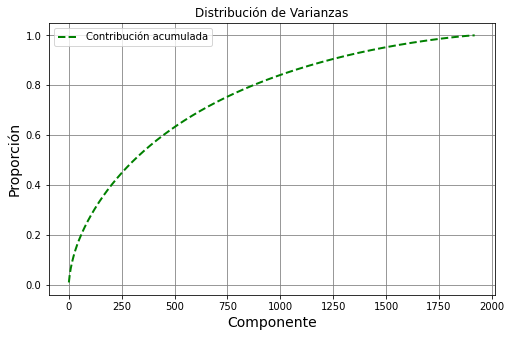

In [ ]:
D = pca_vr[:]

"""Varianza acumulada"""
d = np.cumsum(D)

"""Areas de Graficacion y visualizacion de los datos"""
fig,ax = plt.subplots(figsize=(8,5))

pasos=range(len(D))
datos=np.array(list(map(lambda x,y:[x,y],pasos,d)))
ax.plot(datos[:,0],datos[:,1],
        ls='--',
        color='green',
        linewidth=2,
        label='Contribución acumulada')
plt.title('Distribución de Varianzas')
plt.xlabel('Componente',fontsize=14)
plt.ylabel('Proporción',fontsize=14)
plt.grid(True)
ax.xaxis.grid(True, which='minor')
ax.yaxis.grid(True, which='minor')
ax.grid(which='major', color='gray', linestyle='-')
ax.grid(which='minor', color='grey', linestyle='--')
ax.legend()
plt.show()

**Ejercicio**

Queremos saber que tan bien podemos modelar documentos utilizando estas técnicas de reducción de dimensionalidad.

Elige un número $q$ de componentes principales (que llamaremos _representativos_) para PCA y compara la calidad de los documentos más cercanos (semejantes) a los documentos de análisis mostrados aquí abajo.

## Análisis usando PCA

## Modelación de documentos utilizando componentes principales

In [ ]:
def get_representativos(df,numero=100):
    cols = [col for col in df.columns[:numero+1]]
    rep = df.loc[:, cols]
    return rep

def modela_documentos_rep(df):
    '''
    Regresa un dataframe con el 'id' de Documento y su vector (representación) basada en PCA
    '''
    id_ = df.['doc_id'].values
    datos = df.drop(columns=['doc_id'])
    datos = datos.values
    dx = []
    for i,doc_id in enumerate(id_):
        dx.append((doc_id,datos[i]))
    do = pd.DataFrame(dx,columns=['doc_id','Vectores'])
    return do

In [ ]:
q = 20  #elige un numero q de componentes principales
df_pca = get_representativos(Xpca_df,q)
print(df_pca.shape)
df_pca.head()

(1920, 21)


,doc_id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,657757,0.028446,0.778738,-0.508255,0.273584,-1.542647,-1.712016,0.059897,0.185942,0.569771,...,0.148699,-0.516896,0.047115,0.233726,0.581176,-0.304445,-0.023621,-1.528056,0.141452,1.276618
1,663759,-1.237583,-1.643592,-0.383727,1.271677,-0.478605,-0.842250,0.056365,0.576725,-0.603007,...,1.368826,0.153306,-0.645583,0.543864,-0.310459,-0.528217,-0.185460,1.332486,1.095990,-0.220088
2,657927,0.703016,-0.042016,0.070622,-0.740832,0.138346,0.351572,-0.704776,-0.074803,1.636883,...,1.495875,1.314770,2.576947,0.887235,-0.199731,-1.665131,-0.315754,-0.374256,0.004981,-0.819900
3,655127,0.263822,0.825743,-1.052078,0.164666,-1.548271,-0.557927,1.293845,0.032749,0.186129,...,0.187913,-0.806837,0.514324,0.298651,-0.839674,0.359821,-0.256593,1.297903,1.813918,-0.705405
4,648680,0.827348,-0.905342,-0.029849,0.536417,1.376186,1.017715,-1.266761,-1.120764,1.060860,...,-1.680559,-0.810733,1.262157,-2.194399,0.644317,1.607024,-0.534597,4.357217,-1.258587,0.188027


## Dibuja los puntos (documentos)

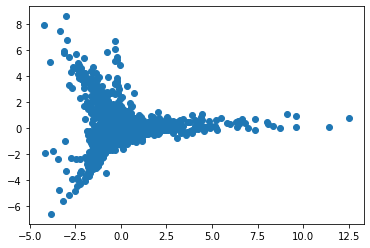

In [ ]:
fig,ax = plt.subplots()
X = df_pca.iloc[:,1:].values
plt.scatter(X[:,0],X[:,1])
plt.show()

Hacemos una animación de las 3 componentes principales y las guardamos en un archivo de video.

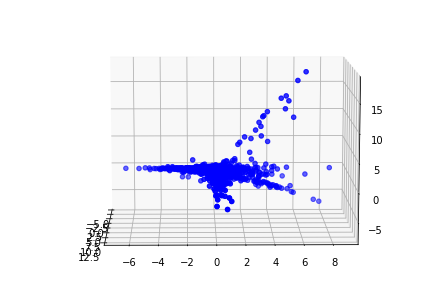

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D Axes
fig = plt.figure()
ax = Axes3D(fig)

def init():
    '''
    Esta función proporciona la figura "prototipo" que se irá modificando
    '''
    ax.scatter(df_pca[0],df_pca[1],df_pca[2], c='b', marker='o')
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('scatter.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

## Documentos de análisis

Creamos un dataframe con el *id* y el *texto*. Solamente tomamos unos cuantos documentos.

In [ ]:
docus = df.head().copy()
docus.drop(columns=['Total','Conteos','Palabras','clase'],inplace=True)  
docus.index=range(len(docus.index))

docus

,doc_id,Texto
0,657757,benjamín jowett nació abril londres inglaterra...
1,663759,torralba oropesa municipio españa comunidad au...
2,657927,artículo refiere grupo musical forma canto med...
3,655127,título original trujillo poder jefe iii título...
4,648680,site map sitemap archivo xml lista páginas sit...


Funciones que calculan el vecino más cercano a cada uno de los documentos de análisis, usando la distancia Euclidiana en las representaciones obtenidas por PCA.

In [ ]:
from collections import OrderedDict

def dist_vecinos(id_docu,df):
    dist = []
    candidato = df[df['doc_id']==id_docu]
    candidato = candidato.iloc[:,1].values[0]
    fila = df.index[df['doc_id'] == id_docu].tolist()
    pts = df.drop(df.index[fila])
    id_ = pts['doc_id'].values
    pts = pts.iloc[:,1].values
    for i in range(len(pts)):
        d = np.sqrt(np.sum(np.square(candidato-pts[i])))
        dist.append((id_docu,id_[i],d))
    dist = sorted(dist,key=lambda x: x[2])
    return dist

def k_vecinos_mas_cercanos(docus,df,k=1):
    l = docus['doc_id'].values
    vec = OrderedDict()
    for id_ in l:
        d = dist_vecinos(id_,df)
        for i in range(k):
            if i==0:
                vec[id_]=[[d[i][1],d[i][2]]]
            else:
                vec[id_].append([d[i][1],d[i][2]])
    return vec

Dataframe con el *id* de documento y su representación vectorial

In [ ]:
edf_pca = modela_documentos_rep(df_pca)
print(edf_pca.shape)
edf_pca.head()

(1920, 2)


,doc_id,Vectores
0,657757,"[0.02844627617651596, 0.778738058358468, -0.50..."
1,663759,"[-1.2375826567612207, -1.6435922553138271, -0...."
2,657927,"[0.7030156662864013, -0.04201617549946078, 0.0..."
3,655127,"[0.263822158066483, 0.8257428021668358, -1.052..."
4,648680,"[0.8273480662195654, -0.9053415375947514, -0.0..."


Obtenemos el vecino más cercano a cada documento de análisis

In [ ]:
k = 1
vecinos_pca = k_vecinos_mas_cercanos(docus,edf_pca,k)
vecinos_pca

OrderedDict([('657757', [['662657', 2.12489497578615]]),
             ('663759', [['649131', 2.2301439118658934]]),
             ('657927', [['647310', 1.403937458131447]]),
             ('655127', [['653740', 2.9575836598712066]]),
             ('648680', [['651999', 3.2655546506916937]])])

Por cada documento de análisis, podemos ver qué documento es el más semejante (el vecino más cercano)

In [ ]:
# id de cada documento a analizar 
doc_names = list(docus['doc_id'].values)

vecinos = []
for d in doc_names:
    vecinos.append(vecinos_pca[d][0])
print(vecinos)

[['662657', 2.12489497578615], ['649131', 2.2301439118658934], ['647310', 1.403937458131447], ['653740', 2.9575836598712066], ['651999', 3.2655546506916937]]


In [ ]:
vecinos = dict(vecinos)
for id_ in vecinos.keys():
    txt = df[df.doc_id==id_]['Texto'].values
    vecinos[id_] = list(txt)[0]
vecinos = pd.DataFrame(vecinos.items(),columns=['vecino','Texto_vecino'])
vecinos

,vecino,Texto_vecino
0,662657,concha urquiza morelia michoacán ensenada baja...
1,649131,nogales municipio españa provincia badajoz com...
2,647310,fosfoglicéridos glicerofosfolípidos moléculas ...
3,653740,josé maría txema aguirre larraona policía auto...
4,651999,fspot visualizador organizador imágenes escrit...


Contruimos el dataframe con el documento a analizar y su vecino más cercano. En ambos, incluimos el texto.

In [ ]:
datos_PCA = pd.concat([docus,vecinos],axis=1)
datos_PCA = datos_PCA.astype({'Texto':str, 'Texto_vecino':str})
datos_PCA

,doc_id,Texto,vecino,Texto_vecino
0,657757,benjamín jowett nació abril londres inglaterra...,662657,concha urquiza morelia michoacán ensenada baja...
1,663759,torralba oropesa municipio españa comunidad au...,649131,nogales municipio españa provincia badajoz com...
2,657927,artículo refiere grupo musical forma canto med...,647310,fosfoglicéridos glicerofosfolípidos moléculas ...
3,655127,título original trujillo poder jefe iii título...,653740,josé maría txema aguirre larraona policía auto...
4,648680,site map sitemap archivo xml lista páginas sit...,651999,fspot visualizador organizador imágenes escrit...


Observemos los textos completos correspondientes:

In [ ]:
for docu in list(docus.doc_id.values):
    print('\nTexto de referencia:\n')
    print(datos_PCA[datos_PCA.doc_id==docu].Texto.values[0][:200])
    print('\nTexto más cercano:\n')
    print(datos_PCA[datos_PCA.doc_id==docu].Texto_vecino.values[0][:200])


Texto de referencia:

benjamín jowett nació abril londres inglaterra falleció octubre año educador traductor teólogo erudito inglés vida nació camberwell familia perteneciente iglesia inglaterra años ingresó saint pauls sc

Texto más cercano:

concha urquiza morelia michoacán ensenada baja california poeta mexicana publicó años primeros poemas revista yucatán revista revistas vivió nueva york militó partido comunista crisis espiritual volcó

Texto de referencia:

torralba oropesa municipio españa comunidad autónoma castilla mancha provincia toledo comarca campana oropesa tierras talavera llanura campo arañuelo alcornoques encinares monte bajo clima continental

Texto más cercano:

nogales municipio españa provincia badajoz comunidad autónoma extremadura situación localiza norte salvaleón cima cerro llamado cabezo nogales pertenece partido judicial almendralejo historia fundació

Texto de referencia:

artículo refiere grupo musical forma canto medieval véase discanto discantus grupo vo

⭕ ¿Qué parámetros podríamos variar para modificar o mejorar estos resultados?

___

# TAREA:
* Utilizando el método de Clustering Jerárquico Aglomerativo y otro método de tu elección, de los vistos en el curso, haz un análisis de clusters de la matriz PCA.
* Tomando algunos puntos (documentos) en cada cluster, analiza los textos para determinar su relación.
* Elige dos o tres valores de componentes principales para tu análisis.
* Reporta tus resultados en un documento PDF.